In [205]:
%matplotlib inline

In [206]:
import nltk
#>>> nltk.download('punkt')

from nltk import tokenize



In [207]:
# Dependencies
import tweepy
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import style

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [208]:
# Import data into pandas from CSV
campaign = "data/presidential-campaign-trail/Election Campaign Trail.csv"
df = pd.read_csv(campaign)
df.head()

,Candidate,Date,Location
0,Donald J. Trump,11-Jul-16,"Virginia Beach, Virginia"
1,Donald J. Trump,16-Jul-16,"New York City, New York"
2,Donald J. Trump,21-Jul-16,"Cleveland, Ohio"
3,Donald J. Trump,27-Jul-16,"Doral, Florida"
4,Donald J. Trump,5-Aug-16,"Green Bay, Wisconsin"


In [209]:
# Locate all speeches in Ohio
df_ohio = df.loc[df["Location"].str.contains("Ohio")]
df_ohio.head()

,Candidate,Date,Location
2,Donald J. Trump,21-Jul-16,"Cleveland, Ohio"
8,Donald J. Trump,15-Aug-16,"Youngstown, Ohio"
16,Donald J. Trump,1-Sep-16,"Cincinnati, Ohio"
17,Donald J. Trump,1-Sep-16,"Wilmington, Ohio"
21,Donald J. Trump,8-Sep-16,"Cleveland, Ohio"


In [210]:
# Find locations in common for speeches in data frame

common_locations = pd.concat(g for _, g in df_ohio.groupby("Location") if len(g) > 1)
common_locations

,Candidate,Date,Location
82,Hillary Clinton,3-Oct-16,"Akron, Ohio"
186,Barack Obama,1-Aug-12,"Akron, Ohio"
16,Donald J. Trump,1-Sep-16,"Cincinnati, Ohio"
97,Hillary Clinton,31-Aug-16,"Cincinnati, Ohio"
115,Mitt Romney,1-Sep-12,"Cincinnati, Ohio"
178,Barack Obama,16-Jul-12,"Cincinnati, Ohio"
223,Barack Obama,17-Sep-12,"Cincinnati, Ohio"
266,Barack Obama,4-Nov-12,"Cincinnati, Ohio"
2,Donald J. Trump,21-Jul-16,"Cleveland, Ohio"
21,Donald J. Trump,8-Sep-16,"Cleveland, Ohio"


In [211]:
# Drop duplicates for candidates who spoke in the more than once
candidate = common_locations.drop_duplicates(subset = ["Candidate", "Location"])
candidate

,Candidate,Date,Location
82,Hillary Clinton,3-Oct-16,"Akron, Ohio"
186,Barack Obama,1-Aug-12,"Akron, Ohio"
16,Donald J. Trump,1-Sep-16,"Cincinnati, Ohio"
97,Hillary Clinton,31-Aug-16,"Cincinnati, Ohio"
115,Mitt Romney,1-Sep-12,"Cincinnati, Ohio"
178,Barack Obama,16-Jul-12,"Cincinnati, Ohio"
2,Donald J. Trump,21-Jul-16,"Cleveland, Ohio"
88,Hillary Clinton,21-Oct-16,"Cleveland, Ohio"
235,Barack Obama,5-Oct-12,"Cleveland, Ohio"
47,Donald J. Trump,13-Oct-16,"Columbus, Ohio"


In [212]:
# Find locations in common for speeches by candidates (Must be greater than 4 since there are 4 candidates)
cities = candidate.groupby('Location')['Candidate'].count()
cities

Location
Akron, Ohio          2
Cincinnati, Ohio     4
Cleveland, Ohio      3
Columbus, Ohio       3
Delaware, Ohio       2
Kent, Ohio           2
Mansfield, Ohio      2
Springfield, Ohio    2
Toledo, Ohio         3
Name: Candidate, dtype: int64

In [213]:
speech_city = "Cincinnati, Ohio"

In [214]:
print(f"The city with whom all 4 candidates spoke was Cincinnati, Ohio.")

The city with whom all 4 candidates spoke was Cincinnati, Ohio.


In [215]:
# Placeholder for strings
trump = ""
clinton = ""
romney = ""
obama = ""

# Open each of the samples
with open("data/presidential-campaign-trail/Trump.txt", encoding='utf-8') as sample:
    trump = sample.read()

with open("data/presidential-campaign-trail/Clinton.txt", encoding='utf-8') as sample:
    clinton = sample.read()

with open("data/presidential-campaign-trail/Romney.txt", encoding='utf-8') as sample:
    romney = sample.read()
    
with open("data/presidential-campaign-trail/Obama.txt", encoding='utf-8') as sample:
    obama = sample.read()
    

In [218]:

# Run Vader Sentiment Analysis on Each of the Samples (Using NLTK for analyzing longer texts)
samples = (trump, clinton, romney, obama)
my_list = ["Trump","Clinton","Romney", "Obama"]
resultlist=[]

maxpos=0
maxneg=0

for sample in samples:
    scores = []
    politicianlist=["positive","negative"]
    sentence_list = tokenize.sent_tokenize(sample)
    paragraphSentiments = 0.0
    
    for sentence in sentence_list:
        vs = analyzer.polarity_scores(sentence)
        print("{:-<65} {}".format(sentence, str(vs["compound"])))
        paragraphSentiments += vs["compound"]
        if (vs["compound"]>maxpos):
            politicianlist[0]=sentence
            maxpos=vs["compound"]
        if (vs["compound"]<maxneg):
            politicianlist[1]=sentence
            maxneg=vs["compound"]
    resultlist.append(politicianlist)
    
    # Run Vader Analysis on each Sample
    print(" Average sentiment of speeches :\t" + str(round(paragraphSentiments / len(sentence_list), 9)))
    print("----------------------------------------------------")
    print("----------------------------------------------------")
    
    #results = analyzer.polarity_scores(sample)
    overall = vs["compound"]
    pos = vs["pos"]
    neu = vs["neu"]
    neg = vs["neg"]

    # Print Samples and Analysis
for i in resultlist:   
    print (i)
            
        


    

Thank you all so much.------------------------------------------- 0.3612
What an honor and a privilege to speak today to the American Legion. 0.6908
I thank Commander Dale Barnett, your vice commanders, and your constitutional officers. 0.3612
You have all done such an incredible job.------------------------ 0.0
The men and women of the American Legion represent the best of America. 0.6369
Strength, courage, selfless devotion.---------------------------- 0.8555
Your organization, and its members, have done so much to defend our country, our flag, and to advance the cause of Americanism – not Globalism. 0.0
We are in your debt.--------------------------------------------- -0.3612
I will never let you down.--------------------------------------- 0.0
Together, we are going to work on so many shared goals.---------- 0.3976
But I want to begin by discussing one goal that I know is so important to all of you: promoting American pride and patriotism in America’s schools. 0.8705
In A Trump Adm

The bill I passed is in all respects similar to what Mr. Romney passed in Massachusetts. 0.3182
It’s working really well there.---------------------------------- 0.3384
He should be proud of it instead of running away from it.-------- 0.4767
And the original idea of using the private sector to make sure that everybody had health care -- that originated as a Republican idea. 0.7783
And I said, fine, I’m willing to work with your ideas to make progress. 0.5574
So I actually think that there are a number of Republican members of Congress who right now feel as if they’ve got to toe the party line. 0.4588
But if the objective is no longer just beating me, my hope is that they’ll be more open to finding common-sense solutions to the problems that our country faces. -0.6652
And I know that is absolutely a goal of mine because in the end, we are not Democrats or Republicans first, we are Americans first. 0.0
That's what I believe.------------------------------------------- 0.0
All right.------

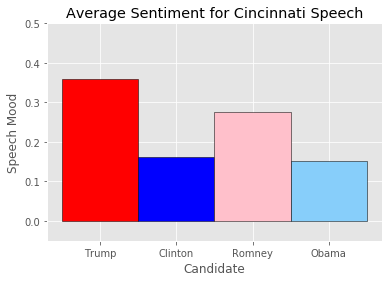

In [217]:
style.use("ggplot")
df = pd.DataFrame({
    "Candidate":["Trump","Clinton","Romney","Obama"],
    "Sentiment":[0.358519118,0.162891406,0.274945745,0.151687567]
})
df = df.set_index("Candidate")

# Create a bar chart
plt.bar(0, (0.35851911), edgecolor = "black", color="red", width=1)
plt.bar(1, (0.162891406), edgecolor = "black", color="blue", width=1)
plt.bar(2, (0.274945745), edgecolor = "black", color="pink", width=1)
plt.bar(3, (0.151687567), edgecolor = "black", color="lightskyblue", width=1)


# Incorporate other plot features
plt.title("Average Sentiment for Cincinnati Speech")
plt.ylim(-0.05, 0.50)
plt.xlabel("Candidate")
plt.ylabel("Speech Mood")
x_labels = ["Trump", "Clinton", "Romney", "Obama"]
x_locations = [value for value in np.arange(4)]
plt.xticks(x_locations, x_labels)
 

#Adds a horizontal line at zero
plt.grid(True)

# Save file to Output folder
plt.savefig("Charts/Average Sentiment for Cincinnati Speech")

plt.show()